DATASET DESCRIPTION

# This is a Glass Identification Data Set . 
It contains 10 attributes including id. The response is glass type(discrete 7 values)

In [3]:
# project work flow
# 1. choose a data set (i choose kidney prediction classification data)
# 2. import all the  necessary libraries
# 3. load the data set using pandas module
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
# 5. model creation by invoking algorithm
# 6. model training by fitting (x train & y train) data
# 7. model prediction (ypre)- 'using xtest'
# 8. calculate perfomace accuracy using output metrics

RANDOM FOREST

In [4]:
# 2. import all the  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# 3. load the data set using pandas module
dataset =pd.read_csv("glass.csv")

In [6]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
dataset.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [8]:
dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [9]:
dataset.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [10]:
dataset.shape

(214, 10)

In [11]:
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
x = dataset.iloc[:,0:9].values
y = dataset.iloc[:,9].values

In [12]:
print(x.shape)
print(y.shape)

(214, 9)
(214,)


In [13]:
x[:5]

array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

In [14]:
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [15]:
# data spliting
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
print('training input samples count',xtrain.shape)
print('training output samples count',ytrain.shape)
print('testing input samples count',xtest.shape)
print('testing output samples count',ytest.shape)

training input samples count (171, 9)
training output samples count (171,)
testing input samples count (43, 9)
testing output samples count (43,)


In [17]:
# 5. model creation by invoking algorithm
rf = RandomForestClassifier()

In [18]:
# 5. model creation by invoking algorithm
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini')

In [19]:
# feature scaling
ss = StandardScaler()
xtrain =ss.fit_transform(xtrain)
xtest =ss.fit_transform(xtest)


In [20]:
# 6. model training by fitting (x train & y train) data
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [21]:
# 7. model prediction (ypre)- 'using xtest'
ypre=rf.predict(xtest)

In [22]:
# 8. calculate perfomace accuracy using output metricsds
accuracy_score(ytest,ypre)

0.6046511627906976

In [23]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre})
compare

,actual output,predicted output
0,7,7
1,1,1
2,2,2
3,6,6
4,5,2
5,2,2
6,2,1
7,2,2
8,1,2
9,2,2


Glass Prediction Using Decision Tree 

In [24]:
dtree = DecisionTreeClassifier(max_depth = 6,criterion = 'entropy')

In [25]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [26]:
ypre_dt=dtree.predict(xtest)

In [27]:
accuracy_score(ytest,ypre_dt)

0.6744186046511628

In [28]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_dt})
compare

,actual output,predicted output
0,7,7
1,1,1
2,2,2
3,6,6
4,5,2
5,2,2
6,2,1
7,2,2
8,1,2
9,2,1


Glass Prediction Using K NEAREST NEIGHBOR

In [29]:
knn = KNeighborsClassifier(n_neighbors=7)

In [30]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7)

In [31]:
ypre_kn=knn.predict(xtest)

In [32]:
accuracy_score(ytest,ypre_kn)

0.6046511627906976

In [33]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_kn})
compare

,actual output,predicted output
0,7,7
1,1,1
2,2,2
3,6,6
4,5,2
5,2,2
6,2,1
7,2,2
8,1,1
9,2,2


In [34]:
report = pd.DataFrame({'model':['Randomforest','Decisiontree','Knn'],
                       'accuracy%':[accuracy_score(ytest,ypre)*100,accuracy_score(ytest,ypre_dt)*100,
                                     accuracy_score(ytest,ypre_kn)*100]})

In [35]:
report

,model,accuracy%
0,Randomforest,60.465116
1,Decisiontree,67.441860
2,Knn,60.465116


<Axes: ylabel='accuracy%'>

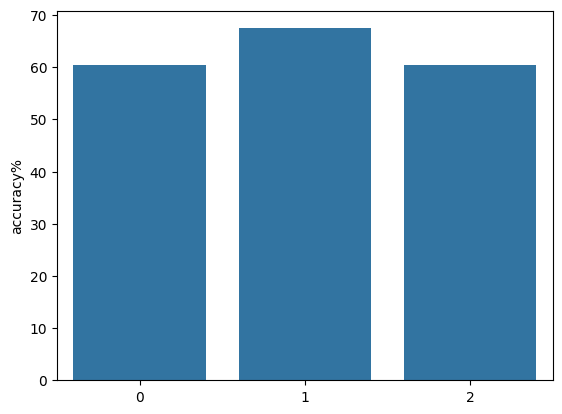

In [36]:
# visualizing the report of all three algorithm
sns.barplot(report['accuracy%'])       

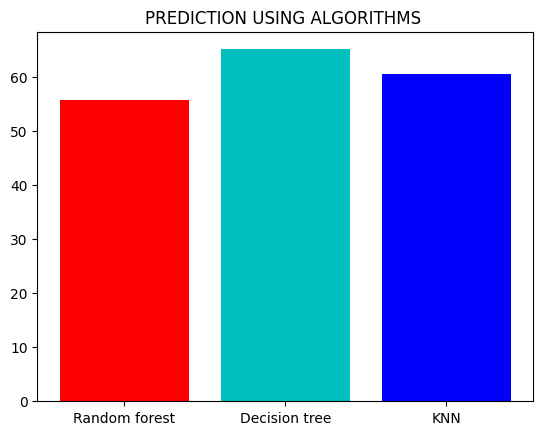

In [37]:
count = [55.81,65.116,60.465]
color_code = ['r','c','b']
plt.bar(['Random forest','Decision tree','KNN'],count,color 
=color_code)
plt.title('PREDICTION USING ALGORITHMS ')
plt.show()